# PARKINSON MOTOR REGRESSION
## Authors: Nerea Losada and Maitane Martinez
## Objectives:

The goal of the project is the application Neural Networks for: 

1) Doing regression of the motor and total UPDRS scores (motor_UPDRS and total_UPDRS) from the 16 voice measures of the dataset. 

2) Implement a multi-layer perceptron for this problem and compare it to one or more classifiers not based on NNs.

3) Implement the solution of the regression problem (the two regression problems simultaneously). 

4) Evaluate and discuss the results of the regressor.

## What is done in the notebook:

In this notebook we can find:

1) The objective of our project

2) The description of our dataset

3) The reading of the dataset

4) The preprocessing to get the data we need for the problem

5) Dividing the dataset: training, test, validation

6) Implementation of a solution of the regression problem using regressors not based on NNs: Linear Regression and Random Forest

7) Implementation of a multi-layer perceptron:
    
    7.1) Definition of the architecture of the NN
    
    7.2) Placeholders for the input data
    
    7.3) Initialization of weights and bias
    
    7.4) Definition of the adam optimizer

    7.5) Creation of the model

    7.6) Validating the model
    
    7.7) Visualization of the results

The database: 

https://drive.google.com/file/d/1qk_vcREHeAnKB46OFbs6ae-C7h6pmFUC/view?usp=sharing



# Importing the libraries
We start by importing all relevant libraries to be used in the notebook. We use pandas, sklearn, numpy, seaborn, matplotlib, and the base of this project, tensorflow

In [3]:
import numpy as np
import seaborn as sns
import pandas as pd

import tensorflow as tf

# To plot the MSE
import matplotlib.pyplot as plt


# Classifiers not based on NNs and metrics
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor


/home/nerea/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/nerea/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/nerea/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/nerea/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:526: Futu

# Reading the dataset

This dataset is composed of a range of biomedical voice measurements from 42 people with early-stage Parkinson's disease recruited to a six-month trial of a telemonitoring device for remote symptom progression monitoring. The recordings were automatically captured in the patient's homes.

In the table we have the following features:

Subject number, subject age, subject gender,  time interval from baseline recruitment date, motor UPDRS, total UPDRS, and 16 biomedical voice measures. Each row corresponds to one of 5,875 voice recording from these individuals. 

The main aim of the data is to predict the motor and total UPDRS scores ('motor_UPDRS' and 'total_UPDRS') from the 16 voice measures, so those are the attributes we are going to take when preprocessing the data.

In [4]:
# We have taken the data from the web page
# http://archive.ics.uci.edu/ml/datasets/Parkinsons+Telemonitoring

# First we define the names of the 22 attributes we mentioned before
names_attributes = ['SUBJECT','AGE','SEX','TEST_TIME','MOTOR_UPDRS' ,'TOTAL_UPDRS','JITTER_PERCENT','JITTER_ABS','JITTER_RAP','JITTER_PPQ5', 'JITTER_DDP','SHIMMER','SHIMMER_DB','SHIMMER_APQ3','SHIMMER_APQ5','SHIMMER_APQ11','SHIMMER_DD','NHR','HNR','RPDE','DFA','PPE']

# Now the file is read using pandas library
dataset_name = 'parkinsons_updrs.data'
table = pd.read_table(dataset_name,sep=',',names=names_attributes,index_col=False)
table = table.drop(0,axis=0)
pd.DataFrame(table)

,SUBJECT,AGE,SEX,TEST_TIME,MOTOR_UPDRS,TOTAL_UPDRS,JITTER_PERCENT,JITTER_ABS,JITTER_RAP,JITTER_PPQ5,...,SHIMMER_DB,SHIMMER_APQ3,SHIMMER_APQ5,SHIMMER_APQ11,SHIMMER_DD,NHR,HNR,RPDE,DFA,PPE
1,1,72,0,5.6431,28.199,34.398,0.00662,3.38e-005,0.00401,0.00317,...,0.23,0.01438,0.01309,0.01662,0.04314,0.01429,21.64,0.41888,0.54842,0.16006
2,1,72,0,12.666,28.447,34.894,0.003,1.68e-005,0.00132,0.0015,...,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.1081
3,1,72,0,19.681,28.695,35.389,0.00481,2.462e-005,0.00205,0.00208,...,0.181,0.00734,0.00844,0.01458,0.02202,0.02022,23.047,0.46222,0.54405,0.21014
4,1,72,0,25.647,28.905,35.81,0.00528,2.657e-005,0.00191,0.00264,...,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.4873,0.57794,0.33277
5,1,72,0,33.642,29.187,36.375,0.00335,2.014e-005,0.00093,0.0013,...,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5871,42,61,0,142.79,22.485,33.485,0.00406,3.113e-005,0.00167,0.00168,...,0.16,0.00973,0.01133,0.01549,0.0292,0.025137,22.369,0.64215,0.55314,0.21367
5872,42,61,0,149.84,21.988,32.988,0.00297,2.469e-005,0.00119,0.00147,...,0.215,0.01052,0.01277,0.01904,0.03157,0.011927,22.886,0.52598,0.56518,0.12621
5873,42,61,0,156.82,21.495,32.495,0.00349,2.47e-005,0.00152,0.00187,...,0.244,0.01371,0.01456,0.01877,0.04112,0.017701,25.065,0.47792,0.57888,0.14157
5874,42,61,0,163.73,21.007,32.007,0.00281,2.034e-005,0.00128,0.00151,...,0.131,0.00693,0.0087,0.01307,0.02078,0.007984,24.422,0.56865,0.56327,0.14204


# Preprocessing the dataset

The goal of the project is to predict the values of two features by using the 16 voice measures, so let us take them from the dataset. Besides, we create another table with the features we want to predict: motor_updrs and total_updrs.

In [5]:
# We make a copy of the dataset
my_dataset = table.copy()

# We take the values of the feature ‘MOTOR_UPDRS’ of the dataset.
all_output = table['MOTOR_UPDRS']

# We put together both attributes we want to predict
all_output= pd.concat([all_output,table['TOTAL_UPDRS']],axis=1)

# Finally we get our dataset just with the features of the 16 voice measures
all_atributes = my_dataset.drop(columns=['SUBJECT','AGE','SEX','TEST_TIME','MOTOR_UPDRS' ,'TOTAL_UPDRS'])

# We take the half of the number of samples to later split the data
n_samples = int(len(my_dataset)/2)

In [6]:
# 16 voice measures
pd.DataFrame(all_atributes)

,JITTER_PERCENT,JITTER_ABS,JITTER_RAP,JITTER_PPQ5,JITTER_DDP,SHIMMER,SHIMMER_DB,SHIMMER_APQ3,SHIMMER_APQ5,SHIMMER_APQ11,SHIMMER_DD,NHR,HNR,RPDE,DFA,PPE
1,0.00662,3.38e-005,0.00401,0.00317,0.01204,0.02565,0.23,0.01438,0.01309,0.01662,0.04314,0.01429,21.64,0.41888,0.54842,0.16006
2,0.003,1.68e-005,0.00132,0.0015,0.00395,0.02024,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.1081
3,0.00481,2.462e-005,0.00205,0.00208,0.00616,0.01675,0.181,0.00734,0.00844,0.01458,0.02202,0.02022,23.047,0.46222,0.54405,0.21014
4,0.00528,2.657e-005,0.00191,0.00264,0.00573,0.02309,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.4873,0.57794,0.33277
5,0.00335,2.014e-005,0.00093,0.0013,0.00278,0.01703,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5871,0.00406,3.113e-005,0.00167,0.00168,0.005,0.01896,0.16,0.00973,0.01133,0.01549,0.0292,0.025137,22.369,0.64215,0.55314,0.21367
5872,0.00297,2.469e-005,0.00119,0.00147,0.00358,0.02315,0.215,0.01052,0.01277,0.01904,0.03157,0.011927,22.886,0.52598,0.56518,0.12621
5873,0.00349,2.47e-005,0.00152,0.00187,0.00456,0.02499,0.244,0.01371,0.01456,0.01877,0.04112,0.017701,25.065,0.47792,0.57888,0.14157
5874,0.00281,2.034e-005,0.00128,0.00151,0.00383,0.01484,0.131,0.00693,0.0087,0.01307,0.02078,0.007984,24.422,0.56865,0.56327,0.14204


In [7]:
# Features to predict
pd.DataFrame(all_output)

,MOTOR_UPDRS,TOTAL_UPDRS
1,28.199,34.398
2,28.447,34.894
3,28.695,35.389
4,28.905,35.81
5,29.187,36.375
...,...,...
5871,22.485,33.485
5872,21.988,32.988
5873,21.495,32.495
5874,21.007,32.007


# Dividing the dataset

To implement Linear Regression and Random Forest we split the data in two sets: train and test, taking half of sample for each of them.

In [8]:
# We get X and y for test and train, n_samples is 
# defined before: half of the samples
X_train, X_test = (all_atributes[:n_samples], all_atributes[n_samples:])
y_train, y_test = (all_output[:n_samples], all_output[n_samples:])

# Regressors not based on NNs

## Linear Regression

We are going to first try Linear Regression for our problem. We use Multiple Linear Regression (MLR), due to we have multiple variables to predict the output of another variable.

In [9]:
# Create the Linear Regression object
lr_regressor = LinearRegression()

# Fitting Linear Regression to the dataset
lr_regressor.fit(X_train, y_train)

# Making Predictions
lr_y_pred = lr_regressor.predict(X_test)

### Evaluating the Algorithm

In [10]:
# As we are going to compute the MSE to evaluate the MLP, we compute it also for Linear Regression
print('Mean Squared Error:', mean_squared_error(y_test, lr_y_pred))

Mean Squared Error: 133.57423491957502


## Random Forest

The second regressor we are going to compute is Random Forest. The trees in random forests are run in parallel. There is no interaction between these trees while building the trees. It operates by constructing a multitude of decision trees at training time and outputting the mean prediction (regression) of the individual trees.

In [11]:
# Create Regressor object 
rf_regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)

# Fitting Random Forest Regression 
#to the dataset
rf_regressor.fit(X_train, y_train)

# We use the forest's predict method on the test data
rf_y_pred = rf_regressor.predict(X_test)

### Evaluating the Algorithm

In [12]:
# As in the previous case, we are going to compute the MSE to evaluate the Random Forest Regressor
print('Mean Squared Error:', mean_squared_error(y_test, rf_y_pred))

Mean Squared Error: 146.2153453379266


## Results

As we can see, the Mean Squared Error got with the Linear Regression is better than the one got with the Random Forest. Nevertheless, there is not much difference between them, Random Forest MSE: 146 and Linear Regression MSE: 133. Now, we are going to implement a solution of this regression problem using Multilayer perceptron.

# Multilayer perceptron

The multilayer perceptron is a neural network that may have one or more hidden layers composed of perceptrons. It has a number of particular characteristics:

1) It is used for Supervised Machine Learning (regression and classification), our problem is a regression problem, so it's useful for us.

2) Differently to the Perceptron model, it can approximate non-linear functions.

3) It can simultaneously approximate multiple target variables, which is our aim in this project

In this case, we are going to split the data in three sets: test, train and validation. This is because we have tried it just with train and test sets and the model overfits, so this way we avoid overfitting.

In [13]:
# We get half of the samples to train the model (2937)
# From the second half of the samples, we use 1000 for validation and the rest (1938) for testing
n_samples = int(len(my_dataset)/2)
v = n_samples+1000
X_train, X_test, X_val = (all_atributes[:n_samples], all_atributes[v:], all_atributes[n_samples:v])
y_train, y_test, y_val = (all_output[:n_samples], all_output[v:], all_output[n_samples:v])

The network architecture is the same use to classification except that the last activation functions are identity functions (they output continuous values instead of 0,1, or probabilities). In this case, we want to output continues values for 'motor_uprds' and 'total_updrs' features.

The neural network will have 2 hidden layers, the first of 12 neurons, and the second of 6.

In [23]:
s = tf.reset_default_graph()
mini_batch_size = 50

In [24]:
## Defining various initialization parameters for 16-12-6-2 MLP model
num_output = y_train.shape[1] # Number of features we have to predict
num_features = X_train.shape[1] # Number of features we have (the 16 voice measures)
train_n_samples = X_train.shape[0] # Number samples for training
num_layers_0 = 12
num_layers_1 = 6

In [25]:
# Placeholders for the input and output variables
X = tf.placeholder(tf.float32,shape =(None,num_features),name="X")
y = tf.placeholder(tf.float32, shape = (None,num_output),name="y")

In [26]:
## Weights initialized by random normal function with std_dev = 1/sqrt(number of input features)
## Initializing weigths and biases
W1 = tf.Variable(tf.random_normal([num_features,num_layers_0], stddev=(1/tf.sqrt(float(num_features)))))
b1 = tf.Variable(tf.random_normal([num_layers_0]))
W2 = tf.Variable(tf.random_normal([num_layers_0,num_layers_1], stddev=(1/tf.sqrt(float(num_layers_0)))))
b2 = tf.Variable(tf.random_normal([num_layers_1]))
W3 = tf.Variable(tf.random_normal([num_layers_1,num_output], stddev=(1/tf.sqrt(float(num_layers_1)))))
b3 = tf.Variable(tf.random_normal([num_output]))


In [27]:
## Initializing weigths and biases
layer1 = tf.nn.relu(tf.add(tf.matmul(X,W1),b1))
layer2 = tf.nn.relu(tf.add(tf.matmul(layer1,W2),b2))
prediction = tf.add(tf.matmul(layer2,W3), b3)

In [28]:
# We compute the loss
loss = tf.reduce_mean(tf.keras.losses.MSE(prediction, y))

In [29]:
## Variable learning rate
learning_rate = 0.001
## Adam optimizer for finding the right weight
adam = tf.train.AdamOptimizer(learning_rate)
# We optimize the loss
optimizer = adam.minimize(loss)
init = tf.global_variables_initializer()

In [35]:
# Training epochs
training_epochs=500000
display_step = 1000

n_batch = train_n_samples // mini_batch_size + (train_n_samples % mini_batch_size != 0)

# structures to save errors
train_errors = list()
val_errors = list()
test_errors = list()
min = float('inf')
max = 0

with tf.Session(config=tf.ConfigProto(allow_soft_placement=True, log_device_placement=True)) as sess:

    # Init the session
    sess.run(init)

    for epoch in range(training_epochs):
        i_batch = (epoch % n_batch)*mini_batch_size
        batch = X_train[i_batch:i_batch+mini_batch_size], y_train[i_batch:i_batch+mini_batch_size]
        sess.run(optimizer, feed_dict={X: batch[0], y: batch[1]})
        
        if (epoch+1) % display_step == 0:
            # train set
            err, p = sess.run((loss, prediction), feed_dict={X: X_train,  y: y_train})
            # validation set which we are going to use to stop the learning when it starts to overfit
            val_loss = sess.run(loss, feed_dict={X: X_val, y: y_val})
            # test set
            test_loss = sess.run(loss, feed_dict={X: X_test, y: y_test})
            # We save errors to plot them later
            train_errors.append(err)
            val_errors.append(val_loss)
            test_errors.append(test_loss)
            # We print the training and the validation MSE 
            print("Epoch:", '%04d' % (epoch+1),"Training MSE:", str(err), "Validation MSE", str(val_loss))
            
            # To decide when we stop the model from learning
            # We save the minimum val_loss we have got, we update it when we get a lower one
            if val_loss < min:
                min = val_loss
                val = val_loss # To save the current value for the next epoch
                e = epoch+1 # The minimum val_loss's epoch, in which we have to stop
                val_error = val # The minimum val_loss
                train_error = err # The train_error when the minimum val_loss
                # If we are getting lower val_loss, we restart the max value
                max = 0
            else:
                # If the current val_loss value is not the minimum, we analyse if it's lower than the previous (val)
                # If it is, we also restart the max value, because we are still decreasing the value, the model is learning
                if val_loss<val:
                    max = 0
                    val = val_loss # To save the current value for the next epoch
                else:
                    # If the current val_loss value is higher than the previous one, val_loss is increasing, so we increase
                    # the max variable
                    val = val_loss  # To save the current value for the next epoch
                    max+=1
                    # When the val_loss value increases consecutively 10 times, we decide that the model is not learning anymore,
                    # that it's overfitting, so we have saved the epoch in which it has started increasing
                    if max > 10:
                        print("")
                        print("Best:")
                        print("Epoch:", '%04d' % (e),"Training MSE:", str(train_error), "Validation MSE", str(val_error))
                    
    
    # MSE for the test set
    mse = mean_squared_error(y_test, sess.run(prediction, {X: X_test}))

    print("Test MSE:", str(mse))

Epoch: 1000 Training MSE: 88.63378 Validation MSE 151.91312
Epoch: 2000 Training MSE: 86.33523 Validation MSE 147.31712
Epoch: 3000 Training MSE: 84.72466 Validation MSE 143.29736
Epoch: 4000 Training MSE: 83.35135 Validation MSE 139.6389
Epoch: 5000 Training MSE: 82.052086 Validation MSE 135.80203
Epoch: 6000 Training MSE: 80.963135 Validation MSE 132.04692
Epoch: 7000 Training MSE: 80.07333 Validation MSE 128.72585
Epoch: 8000 Training MSE: 79.29481 Validation MSE 125.86726
Epoch: 9000 Training MSE: 78.728966 Validation MSE 123.398964
Epoch: 10000 Training MSE: 78.30393 Validation MSE 121.330124
Epoch: 11000 Training MSE: 77.861336 Validation MSE 119.633575
Epoch: 12000 Training MSE: 77.41951 Validation MSE 118.29863
Epoch: 13000 Training MSE: 77.05653 Validation MSE 117.35374
Epoch: 14000 Training MSE: 76.8566 Validation MSE 116.93936
Epoch: 15000 Training MSE: 76.9273 Validation MSE 116.91873
Epoch: 16000 Training MSE: 77.0346 Validation MSE 116.77461
Epoch: 17000 Training MSE: 77.

Epoch: 135000 Training MSE: 70.423416 Validation MSE 99.70229
Epoch: 136000 Training MSE: 70.543274 Validation MSE 99.998085
Epoch: 137000 Training MSE: 70.80783 Validation MSE 100.62045
Epoch: 138000 Training MSE: 70.83064 Validation MSE 100.707016
Epoch: 139000 Training MSE: 70.33705 Validation MSE 99.63855
Epoch: 140000 Training MSE: 69.83159 Validation MSE 98.39321
Epoch: 141000 Training MSE: 69.441025 Validation MSE 97.140175
Epoch: 142000 Training MSE: 69.27656 Validation MSE 96.45877
Epoch: 143000 Training MSE: 69.221466 Validation MSE 95.50956
Epoch: 144000 Training MSE: 69.31289 Validation MSE 94.899025
Epoch: 145000 Training MSE: 69.40006 Validation MSE 94.56492
Epoch: 146000 Training MSE: 69.48437 Validation MSE 94.3299
Epoch: 147000 Training MSE: 69.57913 Validation MSE 94.13672
Epoch: 148000 Training MSE: 69.61233 Validation MSE 94.01656
Epoch: 149000 Training MSE: 69.378334 Validation MSE 94.04107
Epoch: 150000 Training MSE: 69.03722 Validation MSE 94.226
Epoch: 151000 Tr

Epoch: 269000 Training MSE: 63.200226 Validation MSE 90.88316
Epoch: 270000 Training MSE: 62.911724 Validation MSE 92.94631
Epoch: 271000 Training MSE: 63.341084 Validation MSE 95.36775
Epoch: 272000 Training MSE: 63.60697 Validation MSE 96.69597
Epoch: 273000 Training MSE: 63.897564 Validation MSE 98.37281
Epoch: 274000 Training MSE: 64.24661 Validation MSE 99.69783
Epoch: 275000 Training MSE: 64.8393 Validation MSE 101.13014
Epoch: 276000 Training MSE: 64.83746 Validation MSE 101.46639
Epoch: 277000 Training MSE: 64.589676 Validation MSE 98.87658
Epoch: 278000 Training MSE: 64.07457 Validation MSE 97.05267
Epoch: 279000 Training MSE: 64.0623 Validation MSE 95.42669
Epoch: 280000 Training MSE: 64.044815 Validation MSE 93.96464
Epoch: 281000 Training MSE: 64.417336 Validation MSE 92.52495
Epoch: 282000 Training MSE: 64.81601 Validation MSE 92.23306
Epoch: 283000 Training MSE: 65.059296 Validation MSE 92.69846
Epoch: 284000 Training MSE: 64.92102 Validation MSE 91.870285
Epoch: 285000 T

Epoch: 402000 Training MSE: 63.182552 Validation MSE 92.658295
Epoch: 403000 Training MSE: 62.99585 Validation MSE 91.69566
Epoch: 404000 Training MSE: 62.53787 Validation MSE 91.178474
Epoch: 405000 Training MSE: 62.00599 Validation MSE 91.52353
Epoch: 406000 Training MSE: 61.472794 Validation MSE 91.462494
Epoch: 407000 Training MSE: 61.2031 Validation MSE 91.07264
Epoch: 408000 Training MSE: 61.479782 Validation MSE 93.13229
Epoch: 409000 Training MSE: 61.95378 Validation MSE 96.212685
Epoch: 410000 Training MSE: 61.998486 Validation MSE 96.02311
Epoch: 411000 Training MSE: 62.199474 Validation MSE 98.29998
Epoch: 412000 Training MSE: 62.434322 Validation MSE 99.76646
Epoch: 413000 Training MSE: 62.772232 Validation MSE 100.16149
Epoch: 414000 Training MSE: 62.4837 Validation MSE 98.87811
Epoch: 415000 Training MSE: 62.236897 Validation MSE 97.73761
Epoch: 416000 Training MSE: 62.234295 Validation MSE 96.728165
Epoch: 417000 Training MSE: 62.15675 Validation MSE 95.78766
Epoch: 4180

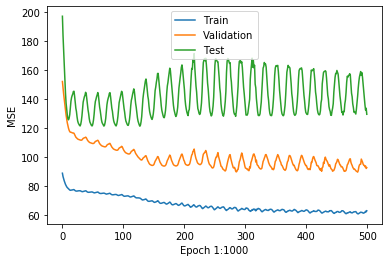

In [36]:
# We plot the errors for the three sets along the epochs
# mini_batch_size = 50
plt.plot(train_errors, label='Train')
plt.plot(val_errors, label='Validation')
plt.plot(test_errors, label='Test')
plt.legend(loc='upper center')
plt.xlabel('Epoch 1:1000')
plt.ylabel('MSE')
plt.show()

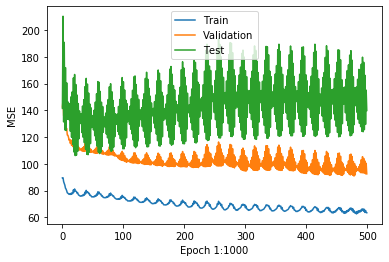

In [22]:
# mini_batch_size = 25
plt.plot(train_errors, label='Train')
plt.plot(val_errors, label='Validation')
plt.plot(test_errors, label='Test')
plt.legend(loc='upper center')
plt.xlabel('Epoch 1:1000')
plt.ylabel('MSE')
plt.show()

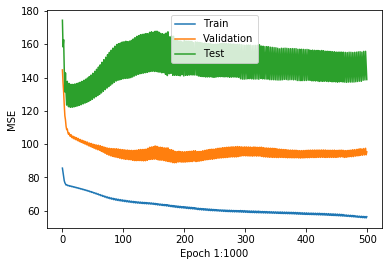

In [76]:
# mini_batch_size = 100
plt.plot(train_errors, label='Train')
plt.plot(val_errors, label='Validation')
plt.plot(test_errors, label='Test')
plt.legend(loc='upper center')
plt.xlabel('Epoch 1:1000')
plt.ylabel('MSE')
plt.show()